<a href="https://colab.research.google.com/github/simsekergun/RingThicknessPrediction/blob/main/DintPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
XY_train = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingThicknessPrediction/refs/heads/main/datasets/Dint_training.csv')

In [3]:
XY_train.head(5)

,Width,Height,0.75,0.7575,0.765,0.7725,0.78,0.7875,0.795,0.8025,...,1.4325,1.44,1.4475,1.455,1.4625,1.47,1.4775,1.485,1.4925,1.5
0,8.000000e-07,6.850000e-07,11363,11108,10821,10504,10167,9809.5,9438.4,9051.4,...,2951.5,2900.2,2837.9,2764.1,2676.1,2576.7,2461.9,2333.7,2191.6,2032.9
1,8.000000e-07,6.900000e-07,11468,11213,10926,10609,10271,9911.9,9539.2,9150.3,...,3354.8,3323.1,3280.9,3227.8,3161.1,3083.4,2990.8,2885.3,2766.5,2631.6
2,8.000000e-07,6.950000e-07,11556,11303,11016,10699,10361,10001.0,9627.3,9237.2,...,3739.6,3726.8,3704.0,3670.7,3624.3,3567.5,3496.3,3412.7,3316.2,3204.3
3,8.000000e-07,6.980000e-07,11602,11349,11063,10746,10408,10048.0,9674.3,9283.7,...,3962.0,3960.1,3948.5,3926.8,3892.2,3847.5,3788.8,3717.9,3634.4,3535.7
4,8.000000e-07,7.000000e-07,11629,11377,11091,10775,10437,10077.0,9703.2,9312.5,...,4106.8,4112.0,4107.8,4093.6,4066.7,4030.0,3979.3,3916.7,3841.8,3751.8


In [4]:
X_train = XY_train.iloc[:,[0,1]]*1e9
X_train.shape

(45, 2)

In [5]:
Y_train = XY_train.iloc[:,2::]
Y_train.shape

(45, 101)

In [6]:
XY_test = pd.read_csv('https://raw.githubusercontent.com/simsekergun/RingThicknessPrediction/refs/heads/main/datasets/Dint_testing.csv')
X_test = XY_test.iloc[:,[0,1]]*1e9
Y_test = XY_test.iloc[:,2::]

In [7]:
import seaborn as sns
# ML models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Multilayer Perceptron
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout


In [8]:
from tensorflow.keras import optimizers
from tensorflow.keras import backend
from keras.layers import LeakyReLU, PReLU
from keras.layers import concatenate

In [9]:
# Let us some functions to normalize, de-normalize, and to calculate errors
def normx(x):
  #return (x - train_statsX['mean']) / train_statsX['std']
  return x / np.max(train_statsX['max'])/2
def denormx(x):
  #return (x - train_statsX['mean']) / train_statsX['std']
  return x*np.max(train_statsX['max'])*2
def norm(y):
  return (y - train_statsY['mean']) / train_statsY['std']
def norm2(y):
  return (y) / np.max(train_statsY['max'])/2
def denorm(y):
  return (y* train_statsY['std'] + train_statsY['mean'])
def denorm2(y):
  return (y* np.max(train_statsY['max'])*2)
def mean_aep(u1,u2):
  return (round(100*(100*sum(abs((u2-u1)/u1))/len(u1)))/100)
def max_aep(u1,u2):
  return (round(100*(100*max(abs((u2-u1)/u1))))/100)


In [10]:
# ANN parameters
ac = 'relu'  # activation function
nnno = 48    # number of neurons
dr_rate = 0.2  # dropout rate
EPOCHS = 400    # number of epocs
LR = 0.001     # learning rate

In [11]:
X_train.shape, Y_train.shape, X_test.shape,  Y_test.shape

((45, 2), (45, 101), (12, 2), (12, 101))

In [12]:
Y_train

,0.75,0.7575,0.765,0.7725,0.78,0.7875,0.795,0.8025,0.81,0.8175,...,1.4325,1.44,1.4475,1.455,1.4625,1.47,1.4775,1.485,1.4925,1.5
0,11363,11108,10821,10504,10167,9809.5,9438.4,9051.4,8654.1,8251.6,...,2951.5,2900.2,2837.9,2764.1,2676.1,2576.7,2461.9,2333.7,2191.6,2032.9
1,11468,11213,10926,10609,10271,9911.9,9539.2,9150.3,8751.0,8346.2,...,3354.8,3323.1,3280.9,3227.8,3161.1,3083.4,2990.8,2885.3,2766.5,2631.6
2,11556,11303,11016,10699,10361,10001.0,9627.3,9237.2,8836.4,8429.9,...,3739.6,3726.8,3704.0,3670.7,3624.3,3567.5,3496.3,3412.7,3316.2,3204.3
3,11602,11349,11063,10746,10408,10048.0,9674.3,9283.7,8882.3,8475.1,...,3962.0,3960.1,3948.5,3926.8,3892.2,3847.5,3788.8,3717.9,3634.4,3535.7
4,11629,11377,11091,10775,10437,10077.0,9703.2,9312.5,8910.8,8503.2,...,4106.8,4112.0,4107.8,4093.6,4066.7,4030.0,3979.3,3916.7,3841.8,3751.8
5,11653,11402,11117,10801,10464,10104.0,9730.3,9339.6,8937.6,8529.7,...,4248.8,4261.1,4264.1,4257.3,4238.1,4209.1,4166.4,4112.0,4045.4,3964.0
6,11686,11436,11152,10837,10500,10141.0,9767.6,9376.9,8974.9,8566.7,...,4456.9,4479.5,4493.1,4497.2,4489.1,4471.6,4440.7,4398.3,4344.1,4275.3
7,11729,11482,11200,10887,10552,10194.0,9821.2,9430.9,9029.1,8620.8,...,4790.7,4829.9,4860.6,4882.3,4892.3,4893.3,4881.3,4858.3,4824.0,4775.5
8,11758,11514,11236,10925,10592,10236.0,9864.4,9475.2,9074.0,8666.1,...,5108.9,5164.0,5211.1,5249.7,5276.9,5295.7,5301.9,5297.6,5282.4,5253.5
9,11432,11179,10894,10578,10242,9883.9,9512.7,9125.1,8727.0,8323.4,...,3266.5,3230.3,3183.6,3125.8,3054.3,2971.7,2874.1,2763.5,2639.4,2499.2


In [13]:
Y_test

,0.75,0.7575,0.765,0.7725,0.78,0.7875,0.795,0.8025,0.81,0.8175,...,1.4325,1.44,1.4475,1.455,1.4625,1.47,1.4775,1.485,1.4925,1.5
0,9364.3,9186.6,8977.3,8742.7,8486.4,8214.8,7927.0,7623.5,7307.3,6986.5,...,4022.3,4057.1,4084.2,4099.8,4109.0,4109.5,4102.0,4081.8,4052.6,4014.1
1,9448.8,9273.1,9065.3,8831.7,8576.0,8304.4,8016.4,7712.3,7395.2,7073.0,...,4458.8,4515.1,4564.3,4602.6,4635.2,4659.6,4676.5,4681.4,4677.9,4665.6
2,9527.3,9357.2,9154.0,8924.3,8671.6,8402.5,8116.1,7813.1,7496.4,7174.2,...,5085.4,5172.9,5254.3,5325.6,5392.0,5451.2,5503.7,5545.1,5579.1,5605.1
3,9540.8,9373.3,9172.5,8944.7,8693.8,8426.1,8141.0,7838.9,7523.0,7201.2,...,5296.3,5394.5,5486.8,5569.3,5647.3,5718.3,5783.0,5836.9,5883.6,5922.7
4,9544.1,9383.8,9189.3,8967.2,8721.3,8457.9,8176.5,7877.5,7564.2,7244.6,...,5740.1,5860.9,5976.4,6082.8,6185.3,6281.5,6372.0,6452.4,6526.3,6593.3
5,9518.2,9365.4,9177.8,8961.9,8721.5,8463.1,8186.1,7891.0,7581.1,7264.3,...,6100.8,6240.2,6374.8,6500.9,6623.6,6740.5,6852.5,6954.7,7051.1,7141.1
6,9368.4,9195.0,8989.5,8758.3,8504.9,8235.7,7950.0,7648.3,7333.6,7013.8,...,4244.9,4290.7,4329.2,4356.4,4377.6,4390.3,4395.3,4388.0,4372.1,4347.0
7,9447.6,9276.5,9072.7,8842.7,8590.1,8321.3,8035.6,7733.4,7417.9,7097.0,...,4675.1,4742.1,4802.4,4852.1,4896.2,4932.6,4961.8,4979.2,4988.6,4989.5
8,9518.5,9353.2,9154.4,8928.6,8679.3,8413.2,8129.5,7828.7,7513.9,7193.2,...,5292.2,5390.1,5482.1,5564.3,5641.9,5712.6,5776.9,5830.4,5876.7,5915.4
9,9529.3,9366.8,9170.4,8946.7,8699.3,8434.7,8152.3,7852.6,7538.6,7218.5,...,5499.9,5608.3,5711.0,5804.3,5893.3,5975.6,6052.0,6117.7,6176.6,6228.2


In [14]:
train_statsY = Y_train.describe().transpose()
train_statsX = X_train.describe().transpose()

In [15]:
np.max(train_statsY['max'])

11821.0

In [16]:
XX = normx(X_train)
YY = norm2(Y_train)
xx = normx(X_test)
yy = norm2(Y_test)

In [17]:
print("NaN in XX:", np.isnan(XX.values).any())
print("Inf in XX:", np.isinf(XX.values).any())
print("NaN in YY:", np.isnan(YY.values).any())
print("Inf in YY:", np.isinf(YY.values).any())

print("NaN in xx:", np.isnan(xx.values).any())
print("Inf in xx:", np.isinf(xx.values).any())
print("NaN in yy:", np.isnan(yy.values).any())
print("Inf in yy:", np.isinf(yy.values).any())

NaN in XX: False
Inf in XX: False
NaN in YY: False
Inf in YY: False
NaN in xx: False
Inf in xx: False
NaN in yy: False
Inf in yy: False


In [18]:
XX.shape, YY.shape, xx.shape, yy.shape,

((45, 2), (45, 101), (12, 2), (12, 101))

In [19]:
visible = Input(shape=(2,))
hidden1 = Dense(4, activation=ac)(visible)
hidden1 = Dropout(dr_rate)(hidden1)
hidden2 = Dense(8, activation=ac)(hidden1)
hidden2 = Dropout(dr_rate)(hidden2)
hidden3 = Dense(16, activation=ac)(hidden2)
hidden3 = Dropout(dr_rate)(hidden3)
hidden4 = Dense(32, activation=ac)(hidden3)
hidden4 = Dropout(dr_rate)(hidden4)
hidden5 = Dense(64, activation=ac)(hidden4)
hidden5 = Dropout(dr_rate)(hidden5)
predicted_value = Dense(101)(hidden4)
modelANN = Model(inputs=visible, outputs=predicted_value)
#
opt = optimizers.Adamax(learning_rate=LR)
modelANN.compile(optimizer=opt, loss=['mse'])
history = modelANN.fit(XX.values, YY.values,epochs=EPOCHS, validation_data = (xx.values,yy.values), verbose=True)

Epoch 1/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 283ms/step - loss: 0.0376 - val_loss: 0.0306
Epoch 2/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0370 - val_loss: 0.0301
Epoch 3/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.0365 - val_loss: 0.0295
Epoch 4/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 0.0359 - val_loss: 0.0290
Epoch 5/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0352 - val_loss: 0.0285
Epoch 6/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0347 - val_loss: 0.0280
Epoch 7/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0344 - val_loss: 0.0276
Epoch 8/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0339 - val_loss: 0.0271
Epoch 9/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.0333 - val_loss: 0.0266
Epoch 10/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0328 - val_loss: 0.0262
Epoch 11/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0320 - val_loss: 0.0257
Epoch 12/400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0321 - 

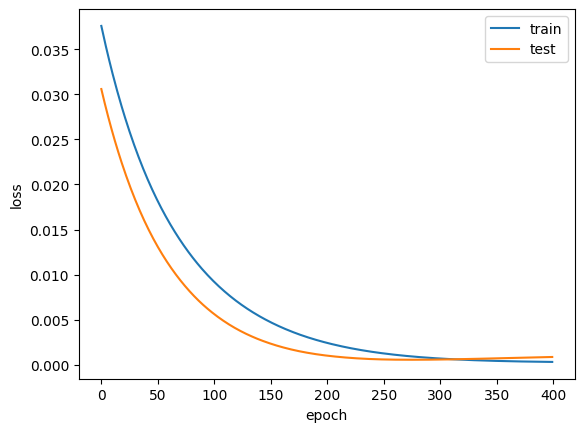

In [20]:
# plot losses
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [21]:
test_predictions = modelANN.predict(xx)
df = pd.DataFrame(test_predictions)
new_headers = list(np.linspace(0.75, 1.5,101))
df.columns = new_headers
df.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


,0.7500,0.7575,0.7650,0.7725,0.7800,0.7875,0.7950,0.8025,0.8100,0.8175,...,1.4325,1.4400,1.4475,1.4550,1.4625,1.4700,1.4775,1.4850,1.4925,1.5000
0,0.455533,0.448084,0.439431,0.429601,0.418857,0.407128,0.39464,0.381263,0.367168,0.35252,...,0.196527,0.197857,0.198822,0.199401,0.199483,0.199183,0.198334,0.19702,0.195223,0.19283
1,0.455533,0.448084,0.439431,0.429601,0.418857,0.407128,0.39464,0.381263,0.367168,0.35252,...,0.196527,0.197857,0.198822,0.199401,0.199483,0.199183,0.198334,0.19702,0.195223,0.19283
2,0.455533,0.448084,0.439431,0.429601,0.418857,0.407128,0.39464,0.381263,0.367168,0.35252,...,0.196527,0.197857,0.198822,0.199401,0.199483,0.199183,0.198334,0.19702,0.195223,0.19283
3,0.455533,0.448084,0.439431,0.429601,0.418857,0.407128,0.39464,0.381263,0.367168,0.35252,...,0.196527,0.197857,0.198822,0.199401,0.199483,0.199183,0.198334,0.19702,0.195223,0.19283
4,0.455533,0.448084,0.439431,0.429601,0.418857,0.407128,0.39464,0.381263,0.367168,0.35252,...,0.196527,0.197857,0.198822,0.199401,0.199483,0.199183,0.198334,0.19702,0.195223,0.19283


In [41]:
x = np.linspace(0.75,1.5,101)

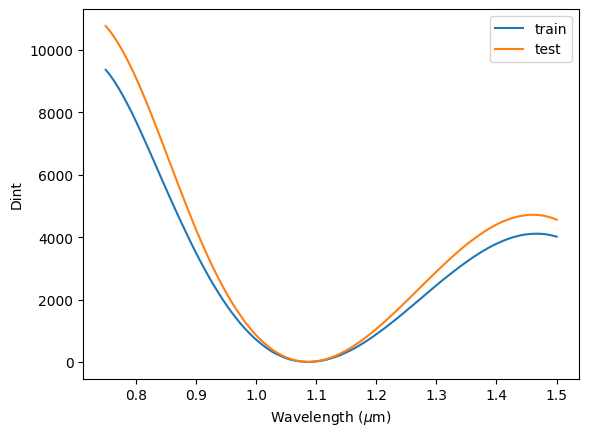

In [42]:
plt.plot(x,yy.iloc[0,:]* np.max(train_statsY['max'])*2,x,df.iloc[0,:]* np.max(train_statsY['max'])*2)
plt.ylabel('Dint')
plt.xlabel('Wavelength ($\mu$m)')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [43]:
for i in range(12):
  Dint_real = yy.iloc[i,:].values* np.max(train_statsY['max'])*2
  Dint_pred = df.iloc[i,:].values* np.max(train_statsY['max'])*2
  errors_percentile = 100*np.max(np.abs(Dint_real - Dint_pred))/np.max(np.abs(Dint_real))
  print(errors_percentile)

15.123473424334978
14.03995662809034
13.040607238540833
14.294553350806526
21.315941221212583
27.129233952782563
14.957919958984462
13.994218356381511
14.251349961587957
17.517705876546543
24.45301982904985
30.21013401248657


In [44]:
#from tensorflow.keras.utils import plot_model
#plot_model(modelANN, to_file='model.png', show_shapes=True, show_layer_names=True)